# Appendix X


## Convolutional Neural Network

## Forex EURUSD Price Prediction Using Keras 
## Tick Data With Dukastcopy
## Data for 2019 year

#### Price normalisation: subtract the minimum divide by the maximum price among 200 ticks that include this tick
##### Normalisation of volumes - based on a maximum of 10 lots (the main number of lots). The interval (from 10 to 5000 lots) are equated to 10 lots (those to 1 after normalisation)
##### We normalise the intervals between ticks - based on a maximum of 20,000 milliseconds (20 seconds) (the main number of intervals). The interval (from 20,000) are equated to 20,000 milliseconds (those to 1 after normalization)

#### The GOAL: According to the dynamics of TICK PRICES and VOLUME Forex EURUSD to predict the price of the next tick
#### We use a csv file with Dukastcopy and Keras which ALREADY normalised

In [33]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

import numpy as np                  
import pandas as pd  

import matplotlib.pyplot as plt
%matplotlib inline 

In [34]:
print(tf.__version__)

2.10.0-dev20220604


In [3]:
# COLABORATE
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [35]:
# Set seed to repeat results for random number generator
# tk we use stachostic optimization methods
np.random.seed(42)

### Data 

In [ ]:
# COLABORATE
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
from google.colab import drive
drive.mount('/content/grive', force_remount=True)

In [3]:
# COLABORATE
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
data = pd.read_csv('/Users/vital/Python_Code/_PhD_Code/Tick/EURUSD_tick_OK-2.csv')

print(data.head(n=5)) 
print(data[-5:]) 

   Vol_Ask_N  Ask_N_200_3  DateDelta1_N  Bid_N_200_3  Vol_Bid_N
0      0.176     0.636364       0.01655     0.515152      0.100
1      0.364     0.606061       0.02750     0.454545      0.420
2      0.100     0.575758       0.09770     0.454545      0.187
3      0.100     0.151515       0.01590     0.121212      0.100
4      0.270     0.212121       0.01040     0.060606      0.214
         Vol_Ask_N  Ask_N_200_3  DateDelta1_N  Bid_N_200_3  Vol_Bid_N
1099995      0.100     0.705357       0.01060     0.687500      0.195
1099996      0.100     0.758929       0.01630     0.741071      0.244
1099997      0.100     0.776786       0.00260     0.750000      0.382
1099998      0.461     0.794643       0.01045     0.758929      0.393
1099999      0.536     0.794643       0.00260     0.758929      0.664


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Vol_Ask_N     1100000 non-null  float64
 1   Ask_N_200_3   1100000 non-null  float64
 2   DateDelta1_N  1100000 non-null  float64
 3   Bid_N_200_3   1100000 non-null  float64
 4   Vol_Bid_N     1100000 non-null  float64
dtypes: float64(5)
memory usage: 42.0 MB


In [39]:
# downsizing

data['Vol_Ask_N']    =pd.to_numeric(data['Vol_Ask_N'],downcast='float')
data['Ask_N_200_3']  =pd.to_numeric(data['Ask_N_200_3'],downcast='float')
data['DateDelta1_N'] =pd.to_numeric(data['DateDelta1_N'],downcast='float')
data['Bid_N_200_3']  =pd.to_numeric(data['Bid_N_200_3'],downcast='float')
data['Vol_Bid_N']    =pd.to_numeric(data['Vol_Bid_N'],downcast='float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Vol_Ask_N     1100000 non-null  float32
 1   Ask_N_200_3   1100000 non-null  float32
 2   DateDelta1_N  1100000 non-null  float32
 3   Bid_N_200_3   1100000 non-null  float32
 4   Vol_Bid_N     1100000 non-null  float32
dtypes: float32(5)
memory usage: 21.0 MB


In [7]:
# n_small = 1100000 # about 4 weeks

# create a three-dimensional data tensor: [(n_small-N + 1), N, 5] and
# two-dimensional array of answers [(n_small-N + 1), N] with a tick price shifted one tick up,
# where N is the number of ticks for analysis at each step (those are looking backward
# then you need to delete the last batch, since there is no price for the subsequent tick for it, BUT we will immediately do
# data array of dimension [(n_small-N + 1-1), N, 5]

##### create numpy 

In [40]:
n = data.shape[0]    
p = data.shape[1]    

n_small = 1100000 
print('Tick number for treining: ', n_small, ' = size of the numpay')

data_a = np.array(data[:n_small]) 

print("data_a:")
print(data_a[:4])  
print('\n')
print(data_a[-4:]) 

print('\n',"Tick number in the DataFrame:          n = ", n, '\n', 
      "Tick number for training:  n_small= ", n_small, '\n',
      "Column number:                  p = ", p)
print(" numpy type:              ", type(data_a), '\n',
      
      "numpy size:              ", data_a.shape)
print('Example: data_a[1,0] = ', data_a[1,0])

Tick number for treining:  1100000  = size of the numpay
data_a:
[[0.176      0.6363636  0.01655    0.5151515  0.1       ]
 [0.364      0.6060606  0.0275     0.45454547 0.42      ]
 [0.1        0.57575756 0.0977     0.45454547 0.187     ]
 [0.1        0.15151516 0.0159     0.12121212 0.1       ]]


[[0.1        0.7589286  0.0163     0.7410714  0.244     ]
 [0.1        0.77678573 0.0026     0.75       0.382     ]
 [0.461      0.79464287 0.01045    0.7589286  0.393     ]
 [0.536      0.79464287 0.0026     0.7589286  0.664     ]]

 Tick number in the DataFrame:          n =  1100000 
 Tick number for training:  n_small=  1100000 
 Column number:                  p =  5
 numpy type:               <class 'numpy.ndarray'> 
 numpy size:               (1100000, 5)
Example: data_a[1,0] =  0.364


##### target: predicting the Bid and Ask values of the next tick in FOREX EURUSD. 
##### we form the response matrix Y with the Bid and Ask values of the next tick in time

In [41]:
N = 200   # N - the depth of analysis at each step of the training (how many ticks we look back) - about 10 minutes

# numpy size (L, N, 5), где L = n_small - N
L = n_small - N
print('Size of a three-dimensional data array for training: ', L, N, 5)

Size of a three-dimensional data array for training:  1099800 200 5


In [42]:
data_b = np.zeros( (L, N, 5), dtype= 'float32' ) 

print('data_b:', '\n', data_b)

print(data_b[L-1, N-1, 0])
print(data_a[n_small-2, 0], '\n')

# create a two-dimensional vector of answers - normalised Ask and Bid
Y = np.zeros((L, 2), dtype= 'float32') # We predict two prices - normalised Ask and Bid
                                      
print('Y:', '\n', Y)


data_b: 
 [[[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  ...
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0.]]]
0.0
0.461 

Y: 
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [43]:
# Progress bar
from tqdm import tqdm

In [44]:
# control the formation of arrays for training
for s in tqdm(range(N-2,N+5)):
    print(s, data_a[s,:])
print('\n')
for s in tqdm(range(n_small-N-5,n_small-N+1)):
    print(s, data_a[s,:])

100%|██████████| 6/6 [00:00<00:00, 4803.55it/s]

198 [0.701      0.36363637 0.0635     0.21212122 0.214     ]
199 [0.101      0.36363637 0.00705    0.21212122 0.532     ]
200 [0.187      0.36363637 0.1094     0.24242425 0.195     ]
201 [0.157      0.33333334 0.0268     0.21212122 0.401     ]
202 [0.112      0.21212122 0.02875    0.15151516 0.375     ]
203 [0.307      0.24242425 0.03105    0.09090909 0.157     ]
204 [0.101      0.21212122 0.0282     0.09090909 0.169     ]


1099795 [0.195      0.17910448 0.09345    0.10447761 0.15      ]
1099796 [0.225      0.13432837 0.0026     0.08955224 0.115     ]
1099797 [0.1        0.10447761 0.0052     0.04477612 0.187     ]
1099798 [0.195      0.10447761 0.0402     0.04477612 0.1       ]
1099799 [0.195      0.08955224 0.0079     0.         0.316     ]
1099800 [0.195     0.0952381 0.02705   0.        0.1      ]


In [45]:
# fill the array for training data_b and the array of answers Y from the original data_a array

print('n_small - N = ', n_small-N)
for k in tqdm(range(n_small-N)):
    data_b[k, :, :] = data_a[k:k+N, :]   
                                          
    Y[k,0] = data_a[k+N,3]   # normalised bid - value for one tick to the future
    Y[k,1] = data_a[k+N,1]   # normalised Ask - value for one tick to the future 
print(k) # ast index value (for control)
    
print('data_b:', '\n', data_b)
print("Numpy size:        ", data_b.shape, '\n')

print( Y[:5,:])
print( Y[-10:,:])
print(      "Numpy size:         ", Y.shape)

  5%|▌         | 57662/1099800 [00:00<00:03, 284044.18it/s]

n_small - N =  1099800


100%|██████████| 1099800/1099800 [00:03<00:00, 291718.68it/s]


1099799
data_b: 
 [[[0.176      0.6363636  0.01655    0.5151515  0.1       ]
  [0.364      0.6060606  0.0275     0.45454547 0.42      ]
  [0.1        0.57575756 0.0977     0.45454547 0.187     ]
  ...
  [0.225      0.33333334 0.03015    0.21212122 0.12      ]
  [0.701      0.36363637 0.0635     0.21212122 0.214     ]
  [0.101      0.36363637 0.00705    0.21212122 0.532     ]]

 [[0.364      0.6060606  0.0275     0.45454547 0.42      ]
  [0.1        0.57575756 0.0977     0.45454547 0.187     ]
  [0.1        0.15151516 0.0159     0.12121212 0.1       ]
  ...
  [0.701      0.36363637 0.0635     0.21212122 0.214     ]
  [0.101      0.36363637 0.00705    0.21212122 0.532     ]
  [0.187      0.36363637 0.1094     0.24242425 0.195     ]]

 [[0.1        0.57575756 0.0977     0.45454547 0.187     ]
  [0.1        0.15151516 0.0159     0.12121212 0.1       ]
  [0.27       0.21212122 0.0104     0.06060606 0.214     ]
  ...
  [0.101      0.36363637 0.00705    0.21212122 0.532     ]
  [0.187      0.

In [46]:
# control of the correctness of filling the array Y (should show the normalized prices Bid and Ask one step ahead)
print('data_b:', '            Y:')
print('Bid       Ask       Bid        Ask')
pp = 789564 # (any number before 1099799)

for i in range(5):
    print(data_b[pp+i,N-1,3], ' ', data_b[pp+i,N-1,1], ' ', Y[pp+i,0], ' ', Y[pp+i,1])

data_b:             Y:
Bid       Ask       Bid        Ask
0.66071427   0.70535713   0.66071427   0.6875
0.66071427   0.6875   0.65178573   0.66071427
0.65178573   0.66071427   0.625   0.65178573
0.625   0.65178573   0.6160714   0.65178573
0.6160714   0.65178573   0.59821427   0.60714287


In [47]:
# We print Min and Max of all normalised columns of signs - All should be in the range [0; 1]
# Check that the matrices are normalised and there are no values> 1

print('\t','\t Max      Min')
mmx  = data_b[:,:,0].max()
mmn  = data_b[:,:,0].min()
print('Vol_Ask_N', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,1].max()
mmn  = data_b[:,:,1].min()
print('Ask_N_use', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,2].max()
mmn  = data_b[:,:,2].min()
print('DateDelta1_N', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,3].max()
mmn  = data_b[:,:,3].min()
print('Bid_N_use', '\t', mmx, '\t', mmn)
mmx  = data_b[:,:,4].max()
mmn  = data_b[:,:,4].min()
print('Vol_Bid_N', '\t', mmx, '\t', mmn)

	 	 Max      Min
Vol_Ask_N 	 1.0 	 0.01
Ask_N_use 	 1.0 	 0.0027027028
DateDelta1_N 	 1.0 	 0.0025
Bid_N_use 	 0.99659866 	 0.0
Vol_Bid_N 	 1.0 	 0.01


### data for subsequent testing

In [48]:
# We allocate about 90% of the data (two-dimensional subarrays) for training and about 10% of the data (two-dimensional subarrays) for testing
# n = data_a.shape [0] # new number of lines
train_start = 0
train_end = int(np.floor(0.9*L))
print(L, train_end)

1099800 989820


In [49]:
# For this example, let’s leave a round number for training: 980,000 two-dimensional subarrays
train_end -= 9820
print(train_end)

980000


In [50]:
test_start = train_end + 1
test_end = L
print(test_start, test_end)

980001 1099800


In [51]:
print("numpy size:        ", data_b.shape, '\n')

numpy size:         (1099800, 200, 5) 



In [52]:
print(test_end-train_end)

119800


In [53]:
# form X_train and X_test
# Divide data_b into two unequal parts: for training (X_train) and for test (X_test)

X_train = np.zeros( ( train_end, N, 5) , dtype= 'float32')
X_test  = np.zeros( ( test_end-train_end, N, 5) , dtype= 'float32')

for z in tqdm(range(test_end)):
    if z < train_end:
        X_train[z,:,:] = data_b[z,:,:]
    else:
        X_test[z-train_end,:,:]  = data_b[z,:,:]    

# print('X_train:', '\n', X_test)
print(" numpy size::        ", X_train.shape, '\n')
print('\n')

# print('X_test:', '\n', X_test)
print(" numpy size::        ", X_test.shape, '\n')


100%|██████████| 1099800/1099800 [00:02<00:00, 462235.15it/s]

 numpy size::         (980000, 200, 5) 



 numpy size::         (119800, 200, 5) 



In [54]:
# Check the correctness of filling
print(X_train[:5,N-1,:])
print(X_train[-5:,N-1,:])
print(X_test[:5,N-1,:])
print(X_test[-5:,N-1,:])

[[0.101      0.36363637 0.00705    0.21212122 0.532     ]
 [0.187      0.36363637 0.1094     0.24242425 0.195     ]
 [0.157      0.33333334 0.0268     0.21212122 0.401     ]
 [0.112      0.21212122 0.02875    0.15151516 0.375     ]
 [0.307      0.24242425 0.03105    0.09090909 0.157     ]]
[[0.125      0.01754386 0.0449     0.         0.11      ]
 [0.157      0.06779661 0.0079     0.         0.195     ]
 [0.139      0.06779661 0.00255    0.         0.221     ]
 [0.514      0.05084746 0.0156     0.         0.1       ]
 [0.514      0.05084746 0.2208     0.         0.1       ]]
[[0.1        0.05084746 0.0264     0.         0.446     ]
 [0.131      0.04       0.026      0.         0.304     ]
 [0.162      0.06       0.0372     0.         0.409     ]
 [0.131      0.04       0.0274     0.02       0.206     ]
 [0.1        0.05882353 0.1014     0.         0.107     ]]
[[0.15       0.6875     0.0095     0.66071427 0.1       ]
 [0.1        0.70535713 0.0106     0.6875     0.195     ]
 [0.1      

#### Create an answer matrix for the training (y_train) and test (y_test) parts

In [55]:
y_train = Y[np.arange(train_start, train_end), :]
y_test = Y[np.arange(test_start,L), :]
print(train_start, train_end, test_start, L)

print('y_train(first 10):', '\n', y_train[:10,:])
print(" numpy size:         ", y_train.shape ,'\n')

data_add_row = np.array([y_test[L-test_start-1,0], y_test[L-test_start-1,1]])
print(L-test_start-1, data_add_row)
y_test = np.vstack([y_test, data_add_row]) 


print('y_test(last 10 ):', '\n', y_test[-10:,:])
print(" numpy size:         ", y_test.shape)

0 980000 980001 1099800
y_train(first 10): 
 [[0.24242425 0.36363637]
 [0.21212122 0.33333334]
 [0.15151516 0.21212122]
 [0.09090909 0.24242425]
 [0.09090909 0.21212122]
 [0.18181819 0.24242425]
 [0.21212122 0.33333334]
 [0.24242425 0.36363637]
 [0.24242425 0.36363637]
 [0.21212122 0.33333334]]
 numpy size:          (980000, 2) 

119798 [0.7589286  0.79464287]
y_test(last 10 ): 
 [[0.65178573 0.6964286 ]
 [0.66071427 0.6964286 ]
 [0.65178573 0.66071427]
 [0.66071427 0.6875    ]
 [0.6875     0.70535713]
 [0.7410714  0.7589286 ]
 [0.75       0.77678573]
 [0.7589286  0.79464287]
 [0.7589286  0.79464287]
 [0.7589286  0.79464287]]
 numpy size:          (119800, 2)


#### Final control

In [56]:
# print X_train, y_train, X_test и y_test

print('Data for training:')
print("X_train:")
print("Type: ", X_train.dtype,  type(X_train), "; Size: ", X_train.shape)

print("\n","y_train:")
print("Type: ", y_train.dtype,  type(y_train), "; Size: ", y_train.shape)

print('Data for testing:')
print("\n","X_test:")
print("Type: ", X_test.dtype, type(X_test), "; Size: ", X_test.shape)

print("\n","y_test:")
print("Type: ", y_test.dtype,  type(y_test), "; Size: ", y_test.shape)

Data for training:
X_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (980000, 200, 5)

 y_train:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (980000, 2)
Data for testing:

 X_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (119800, 200, 5)

 y_test:
Type:  float32 <class 'numpy.ndarray'> ; Size:  (119800, 2)


### Neural Network

#### Create NN

In [57]:
# Create a consistent model
model = keras.Sequential([
    
    keras.layers.Conv1D(200, 9, padding='same', input_shape=(200, 5), activation=tf.nn.relu, kernel_initializer="normal"),

    keras.layers.MaxPooling1D(7),

    keras.layers.Conv1D(400, 7, padding='same', activation=tf.nn.relu, kernel_initializer="normal"),  

    keras.layers.GlobalMaxPooling1D(),

    keras.layers.Dense(100, activation=tf.nn.relu, kernel_initializer="normal"),

    keras.layers.Dense(2)
    
])

print(model.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 200, 200)          9200      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 28, 200)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 400)           560400    
                                                                 
 global_max_pooling1d_1 (Glo  (None, 400)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 100)               40100     
                                                                 
 dense_3 (Dense)             (None, 2)                

#### Callbacks

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [59]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=7, verbose=1)

In [60]:
mc = ModelCheckpoint('best_model_mae.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

### Compile the model

In [62]:

model.compile(optimizer="adam", loss="mae", metrics=["mse"])  



### Trainig NN

In [63]:
history = model.fit(X_train, y_train, batch_size=100, epochs=50, validation_split=0.3, 
                    shuffle=True, verbose=1, callbacks=[es, mc])



Epoch 1/50
6860/6860 [==============================] - ETA: 0s - loss: 0.0296 - mse: 0.0019
Epoch 1: val_loss improved from inf to 0.02410, saving model to best_model_mae.h5
6860/6860 [==============================] - 391s 57ms/step - loss: 0.0296 - mse: 0.0019 - val_loss: 0.0241 - val_mse: 0.0012
Epoch 2/50
6860/6860 [==============================] - ETA: 0s - loss: 0.0229 - mse: 0.0011
Epoch 2: val_loss improved from 0.02410 to 0.02391, saving model to best_model_mae.h5
6860/6860 [==============================] - 389s 57ms/step - loss: 0.0229 - mse: 0.0011 - val_loss: 0.0239 - val_mse: 0.0011
Epoch 3/50
6859/6860 [============================>.] - ETA: 0s - loss: 0.0220 - mse: 9.9027e-04
Epoch 3: val_loss improved from 0.02391 to 0.02206, saving model to best_model_mae.h5
6860/6860 [==============================] - 399s 58ms/step - loss: 0.0220 - mse: 9.9024e-04 - val_loss: 0.0221 - val_mse: 0.0010
Epoch 4/50
6859/6860 [============================>.] - ETA: 0s - loss: 0.0216 - 

Epoch 29/50
6859/6860 [============================>.] - ETA: 0s - loss: 0.0194 - mse: 8.1940e-04
Epoch 29: val_loss improved from 0.01984 to 0.01984, saving model to best_model_mae.h5
6860/6860 [==============================] - 391s 57ms/step - loss: 0.0194 - mse: 8.1937e-04 - val_loss: 0.0198 - val_mse: 8.5987e-04
Epoch 30/50
6860/6860 [==============================] - ETA: 0s - loss: 0.0194 - mse: 8.1836e-04
Epoch 30: val_loss did not improve from 0.01984
6860/6860 [==============================] - 410s 60ms/step - loss: 0.0194 - mse: 8.1836e-04 - val_loss: 0.0202 - val_mse: 8.7507e-04
Epoch 31/50
6860/6860 [==============================] - ETA: 0s - loss: 0.0194 - mse: 8.1716e-04
Epoch 31: val_loss did not improve from 0.01984
6860/6860 [==============================] - 413s 60ms/step - loss: 0.0194 - mse: 8.1716e-04 - val_loss: 0.0203 - val_mse: 8.8225e-04
Epoch 32/50
6859/6860 [============================>.] - ETA: 0s - loss: 0.0194 - mse: 8.1507e-04
Epoch 32: val_loss did 

### Mean absolute error (MAE) graphs during training

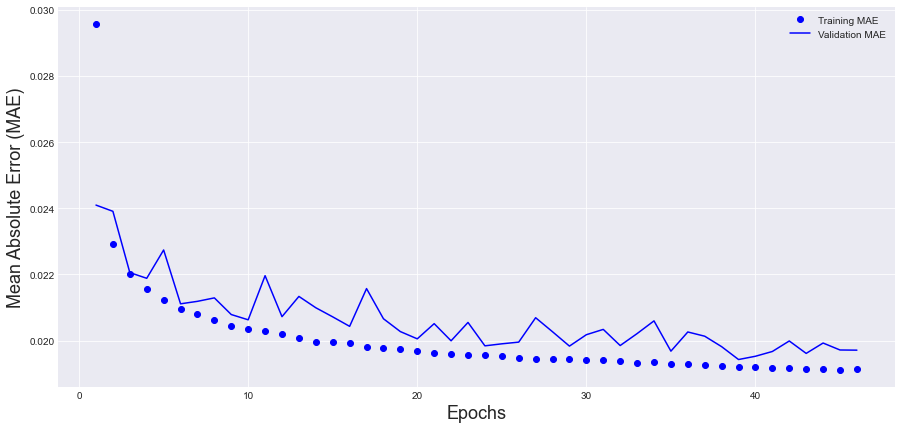

In [64]:
history_dict = history.history
plt.style.use('seaborn-darkgrid') 
mean_absolute_error_values = history_dict['loss']

val_mean_absolute_error_values = history_dict['val_loss']

epochs = range(1, len(mean_absolute_error_values) + 1)
plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, mean_absolute_error_values, 'bo', label='Training MAE')
plt.plot(epochs, val_mean_absolute_error_values, 'b', label='Validation MAE')
plt.xlabel('Epochs', size=18)
plt.ylabel('Mean Absolute Error (MAE)', size=18)
plt.legend()
plt.show()

#### load the saved model

In [39]:
model = keras.models.load_model('best_model_mae.h5')

### Evaluation

In [66]:
# Evaluate the quality of network training on test data (which the network did NOT see)
mae, mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean absolute error: %.3f%%" % (mae*100))

Mean absolute error: 2.842%


In [67]:
print("Mean squared error: %.3f%%" % (mse*100))

Mean squared error: 0.176%


### Using a Neural Network to Predict Bid and Ask Prices of the Next Tick - FOREX EURUSD

In [70]:
# reverse translation of relative prices to absolute

data_real_full = pd.read_csv('/Users/vital/Python_Code//_PhD_Code/Tick/EURUSD_tick_real-3.csv')

print(data_real.head(n=5)) 
print(data_real[-5:]) 

   Min_200_3  Max_200_3  Delta_200_3
0    1.24289    1.24337      0.00048
1    1.24289    1.24337      0.00048
2    1.24289    1.24337      0.00048
3    1.24289    1.24337      0.00048
4    1.24289    1.24337      0.00048
         Min_200_3  Max_200_3  Delta_200_3
1099995    1.22707    1.22828      0.00121
1099996    1.22707    1.22828      0.00121
1099997    1.22707    1.22828      0.00121
1099998    1.22707    1.22828      0.00121
1099999    1.22707    1.22828      0.00121


In [71]:
# create numpay for min and delta for each 200-ticks

data_real = pd.read_csv('/Users/vital/Python_Code//_PhD_Code/Tick/EURUSD_tick_real-3.csv')

#data_real.drop('2', axis=1, inplace=True) 
#data_real.drop('3', axis=1, inplace=True)
#data_real.drop('4', axis=1, inplace=True)
data_real.drop('Delta_200_3', axis=1, inplace=True) 

print(data_real.head(n=5))
print(data_real[-5:]) 

d_real = np.zeros((test_end-train_end, 2), dtype= 'float64') 
# create a two-dimensional vector of real min, max prices on each 200 tick slice
d_real[:(test_end-train_end)][:] = np.array(data_real[test_start-1:test_end][:]) 
  
print('d_real:', '\n', d_real)
print(" size        ", d_real.shape)

   Min_200_3  Max_200_3
0    1.24289    1.24337
1    1.24289    1.24337
2    1.24289    1.24337
3    1.24289    1.24337
4    1.24289    1.24337
         Min_200_3  Max_200_3
1099995    1.22707    1.22828
1099996    1.22707    1.22828
1099997    1.22707    1.22828
1099998    1.22707    1.22828
1099999    1.22707    1.22828
d_real: 
 [[1.22603 1.22645]
 [1.22603 1.22645]
 [1.22603 1.22645]
 ...
 [1.22746 1.22828]
 [1.22746 1.22828]
 [1.22746 1.22828]]
 size         (119800, 2)


In [93]:
import random

pred = model.predict(X_test)

# Check: we take a random element random.randint () and look: what is the difference between absolute and relative

n_rec = random.randint(0, X_test.shape[0])
print(n_rec)

data_real_full_np_0 = np.array(data_real_full['Min_200_3'].iloc[n_rec])
data_real_full_np_2 = np.array(data_real_full['Delta_200_3'].iloc[n_rec])

Absolute_predicted_price = pred[n_rec]*data_real_full_np_2 + data_real_full_np_0
Absolute_right_price     = y_test[n_rec]*data_real_full_np_2 + data_real_full_np_0
error                    = (Absolute_predicted_price-Absolute_right_price)/Absolute_right_price


print('Relative parameters:')
print("Predicted price:", pred[n_rec], ", Right price:", y_test[n_rec], ", error:", pred[n_rec]-y_test[n_rec], 
      "%error:", (pred[n_rec]-y_test[n_rec])/y_test[n_rec]*100,"%")
print('\n')
print('Absolute parameters:')
print("Predicted price:", Absolute_predicted_price, 
      ", Right price:",   Absolute_right_price, 
      ", error:",         error, 
      " %error:",         error*100,"%")



3744/3744 [==============================] - 25s 7ms/step
8990
Relative parameters:
Predicted price: [0.9338838 0.9748567] , Right price: [0.9381443  0.96907216] , error: [-0.00426054  0.00578451] %error: [-0.4541455  0.5969123] %


Absolute parameters:
Predicted price: [1.2430463 1.2430733] , Right price: [1.2430491 1.2430695] , error: [-2.3016169e-06  3.0687722e-06]  %error: [-0.00023016  0.00030688] %


### Price Chart

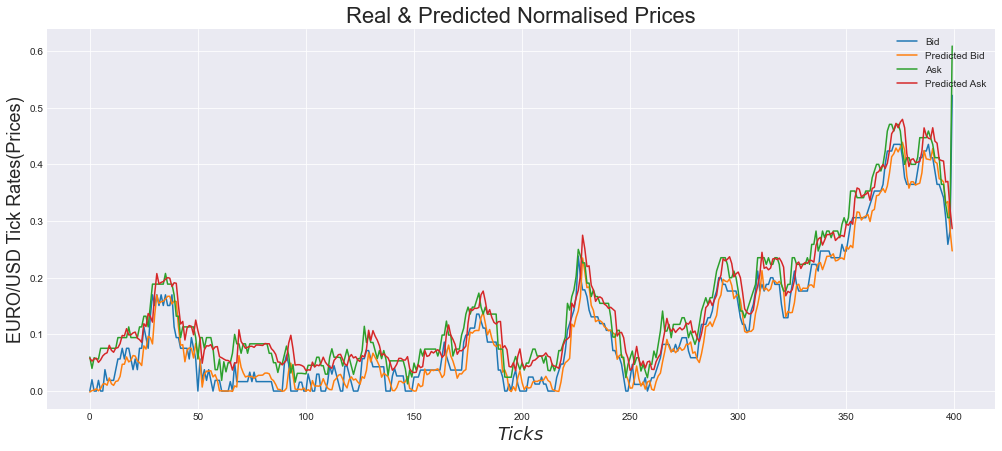

In [74]:

plt.style.use('seaborn-darkgrid') 
plt.ion()
#fig = plt.figure(figsize=(23,8))  
fig = plt.figure(figsize=(17,7))  

ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test[:400,0], label='Bid')
line2, = ax1.plot(pred[:400,0], label='Predicted Bid')
line3, = ax1.plot(y_test[0:400,1], label='Ask')
line4, = ax1.plot(pred[:400,1], label='Predicted Ask')

plt.title('Real & Predicted Normalised Prices', size=22)
plt.ylabel('EURO/USD Tick Rates(Prices)', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()


In [75]:
print(y_test.shape, '  ', pred.shape, '  ', d_real.shape)

(119800, 2)    (119800, 2)    (119800, 2)


### Detailed price chart

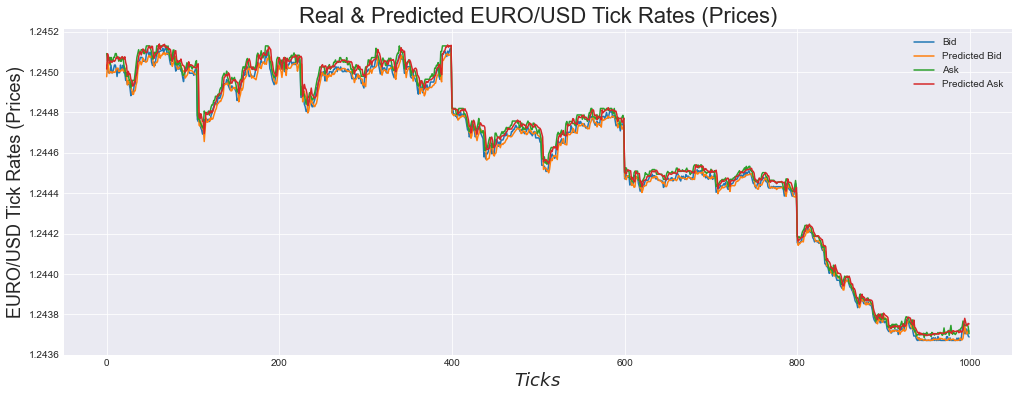

In [76]:
# Setting an interactive chart of ABSOLUTE prices
# Setting an interactive chart of ABSOLUTE prices
N1=26000   
N2=27000   
plt.style.use('seaborn-darkgrid') 
plt.ion()
fig = plt.figure(figsize=(17,6))  
ax1 = fig.add_subplot(111)

data_real_full_NN_2 = np.array(data_real_full['Delta_200_3'].iloc[N1:N2])
data_real_full_NN_0 = np.array(data_real_full['Min_200_3'].iloc[N1:N2])

line1, = ax1.plot(y_test[N1:N2,0]*data_real_full_NN_2 + data_real_full_NN_0, label='Bid')
line2, = ax1.plot(pred[N1:N2,0]*data_real_full_NN_2 + data_real_full_NN_0, label='Predicted Bid')
line3, = ax1.plot(y_test[N1:N2,1]*data_real_full_NN_2 + data_real_full_NN_0, label='Ask')
line4, = ax1.plot(pred[N1:N2,1]*data_real_full_NN_2 + data_real_full_NN_0, label='Predicted Ask')

plt.title('Real & Predicted EURO/USD Tick Rates (Prices)', size=22)
plt.ylabel('EURO/USD Tick Rates (Prices)', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()

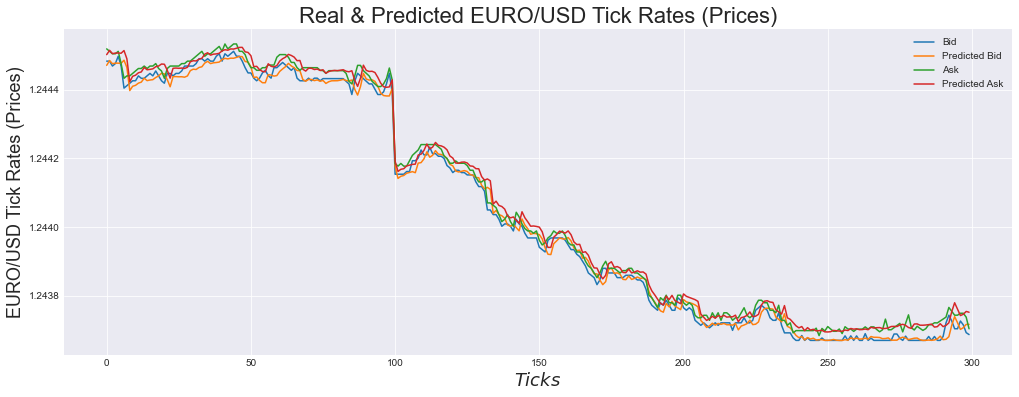

In [77]:
# Setting an interactive chart of ABSOLUTE prices
N1=26700   # start
N2=27000   # end
plt.style.use('seaborn-darkgrid') 
plt.ion()
fig = plt.figure(figsize=(17,6))  
ax1 = fig.add_subplot(111)

data_real_full_NN_2 = np.array(data_real_full['Delta_200_3'].iloc[N1:N2])
data_real_full_NN_0 = np.array(data_real_full['Min_200_3'].iloc[N1:N2])

line1, = ax1.plot(y_test[N1:N2,0]*data_real_full_NN_2 + data_real_full_NN_0, label='Bid')
line2, = ax1.plot(pred[N1:N2,0]*data_real_full_NN_2 + data_real_full_NN_0, label='Predicted Bid')
line3, = ax1.plot(y_test[N1:N2,1]*data_real_full_NN_2 + data_real_full_NN_0, label='Ask')
line4, = ax1.plot(pred[N1:N2,1]*data_real_full_NN_2 + data_real_full_NN_0, label='Predicted Ask')

plt.title('Real & Predicted EURO/USD Tick Rates (Prices)', size=22)
plt.ylabel('EURO/USD Tick Rates (Prices)', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()


## Error Chart

<ipython-input-78-dcd766441e39>:6: RuntimeWarning: divide by zero encountered in true_divide
  a = (pred[:,0]-y_test[:,0])/y_test[:,0]


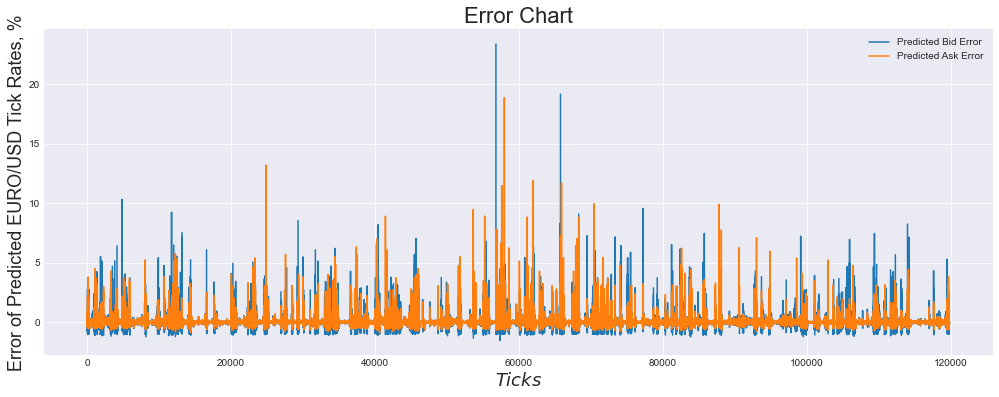

In [78]:

plt.style.use('seaborn-darkgrid') 
plt.ion()
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(111)
#a = (pred[:,0]-y_test[:,0])/y_test[:,0]*100
a = (pred[:,0]-y_test[:,0])/y_test[:,0]
#b = (pred[:,1]-y_test[:,1])/y_test[:,1]*100
b = (pred[:,1]-y_test[:,1])/y_test[:,1]
line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted EURO/USD Tick Rates, %', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()



#### Detailed graph of Errors

<ipython-input-79-64fbd5ee1e6a>:9: RuntimeWarning: divide by zero encountered in true_divide
  a = (pred[N1:N2,0]-y_test[N1:N2,0])/y_test[N1:N2,0]


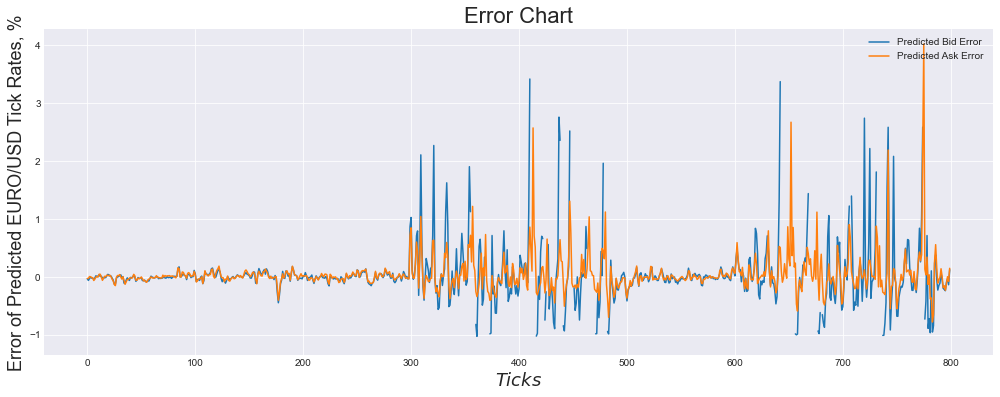

In [79]:

N1=32700      # start
N2=33500   # end

plt.style.use('seaborn-darkgrid') 
plt.ion()
fig = plt.figure(figsize=(17,6))  
ax1 = fig.add_subplot(111)
#a = (pred[N1:N2,0]-y_test[N1:N2,0])/y_test[N1:N2,0]*100
a = (pred[N1:N2,0]-y_test[N1:N2,0])/y_test[N1:N2,0]
#b = (pred[N1:N2,1]-y_test[N1:N2,1])/y_test[N1:N2,1]*100
b = (pred[N1:N2,1]-y_test[N1:N2,1])/y_test[N1:N2,1]
line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted EURO/USD Tick Rates, %', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()



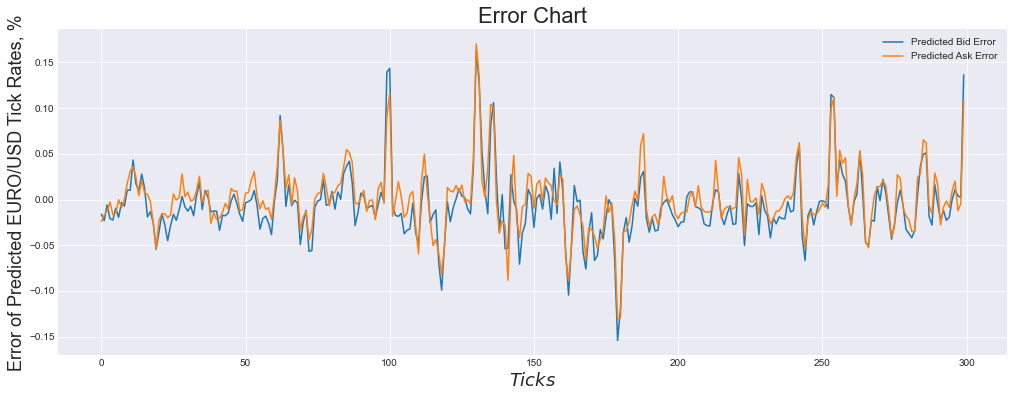

In [81]:

N1=35700      # start
N2=36000   # end

plt.style.use('seaborn-darkgrid') 
plt.ion()
fig = plt.figure(figsize=(17,6))  
ax1 = fig.add_subplot(111)
#a = (pred[N1:N2,0]-y_test[N1:N2,0])/y_test[N1:N2,0]*100
a = (pred[N1:N2,0]-y_test[N1:N2,0])/y_test[N1:N2,0]
#b = (pred[N1:N2,1]-y_test[N1:N2,1])/y_test[N1:N2,1]*100
b = (pred[N1:N2,1]-y_test[N1:N2,1])/y_test[N1:N2,1]
line1, = ax1.plot(a, label='Predicted Bid Error')
line2, = ax1.plot(b, label='Predicted Ask Error')

plt.title('Error Chart', size=22)
plt.ylabel('Error of Predicted EURO/USD Tick Rates, %', size=18)
plt.xlabel('$Ticks$', size=18)
plt.legend(loc='upper right') 

plt.show()
